# Investigation of Prosper Loan Data
## by Gabriella Arroyo

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_full = pd.read_csv('prosperLoanData.csv')
col_list = ['Term', 'LoanStatus', 'BorrowerRate','ListingCategory (numeric)','EmploymentStatus', 'IsBorrowerHomeowner',
            'CreditScoreRangeLower','DelinquenciesLast7Years','BankcardUtilization', 'DebtToIncomeRatio','IncomeRange',
            'IncomeVerifiable', 'StatedMonthlyIncome','LoanOriginalAmount']
df = df_full[col_list]
#dropping rows with null values
df = df.dropna()

#separating into numerical and categorical values
num_vars = ['BorrowerRate','CreditScoreRangeLower', 'DelinquenciesLast7Years', 'BankcardUtilization', 'DebtToIncomeRatio',
            'StatedMonthlyIncome','LoanOriginalAmount']
cat_vars = ['Term', 'LoanStatus', 'ListingCategory (numeric)','EmploymentStatus',
       'IsBorrowerHomeowner', 'IncomeRange','IncomeVerifiable']

#creating a new dataframe without the highest outliers of income
df_income = df[df['StatedMonthlyIncome'] < 10000]

#creating a second income dataframe without the "not displayed" or "not employed" columns
df_income2 = df_income.loc[df_income['IncomeRange'].isin(['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999'])]
cat_ord = ['$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999']
ord_class = pd.api.types.CategoricalDtype(ordered = True, categories = cat_ord)
df_income2['IncomeRange'] = df_income2['IncomeRange'].astype(ord_class);

#creating a seaparate loan dataframe without the single cancelled value
df_loan = df
df_loan.query('LoanStatus == "Cancelled"')
df_loan = df_loan.drop(index=[112975])


#reordering the new dataframe so that cancelled doesn't show up in the value counts
cat_ord = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
           'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff']
ord_class = pd.api.types.CategoricalDtype(ordered = True, categories = cat_ord)
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype(ord_class);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

print('Percentage of people using over 100% of their bank card limit:',z,'%')
print('The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 -Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans')
print('The largest reason for taking out a Prosper Loan by orders of magnitude is Debt Consolidation, 55% of all loans are debt consolidation loans. Next highest is "Other", and third highest is "Not Available"')  

Percentage of people using over 100% of their bank card limit: 1.70 %


TypeError: 'function' object is not subscriptable

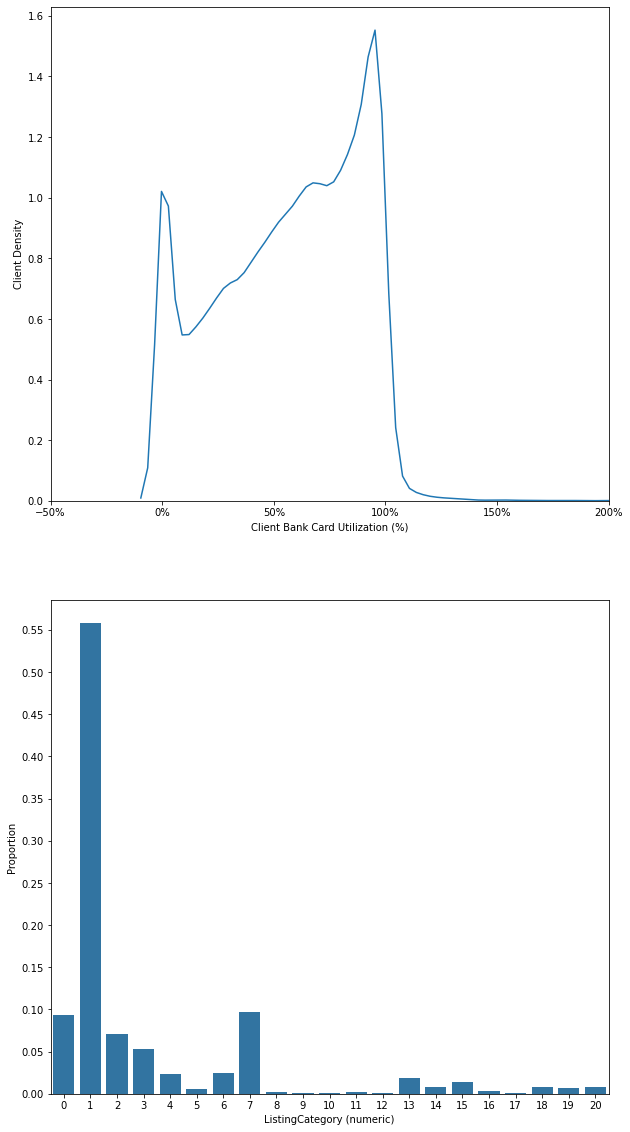

In [14]:
import matplotlib.ticker as mtick

base_color = sb.color_palette()[0]
plt.figure(figsize = [10,20])
plt.subplot(2,1,1)

ax = sb.kdeplot(df.BankcardUtilization)
plt.xlim(-.5,2);

z = df.query('BankcardUtilization > 1')['Term'].count() / df.shape[0] *100
z = "{:.2f}".format(z)
print('Percentage of people using over 100% of their bank card limit:',z,'%')
plt.xlabel('Client Bank Card Utilization (%)')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Client Density')


plt.subplot(2,1,2)
n = df.shape[0]
counts = df['ListingCategory (numeric)'].value_counts()
max_counts = counts[1]
max_prop = max_counts/n
tick_props = np.arange(0, max_prop, .05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

ax = sb.countplot(data = df, x = 'ListingCategory (numeric)', color = base_color);
plt.yticks(tick_props *n, tick_names);
plt.ylabel('Proportion');
locs, labels=plt.xticks()
new_labels = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby & Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
plt.xticks[locs, new_labels]

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [ ]:
df_samp = df.sample(5000,replace=False)

plt.figure(figsize = [10,5])
sb.regplot(data = df_samp, x = 'BorrowerRate',y =  'CreditScoreRangeLower',  x_jitter = 0.2, y_jitter = 10, scatter_kws = {'alpha':1/10});

## (Visualization 3)



In [ ]:
sb.set_style("ticks")
h = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', row = 'IncomeVerifiable', height = 5, margin_titles = True);
h.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmin = 0.05, cmap = "Greens");
h.set_xlabels('Credit Score');
h.set_ylabels('Loan Interest Rate');

## (Visualization 4)



In [ ]:
h = sb.FacetGrid(data = df_income2,  row = 'IncomeRange', height = 6, margin_titles = True);
h.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmin = 0.05, cmap = "Greens");
h.set_xlabels('Credit Score');
h.set_ylabels('Loan Interest Rate');

## (Visualization 5)



In [ ]:
g = sb.FacetGrid(data = df_loan, row = 'LoanStatus', height = 1.75, aspect = 7);
g.map(sb.kdeplot, 'BorrowerRate', shade = True)
g.set_titles('{row_name}');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!